# 第四章 协同推理和行动 ReAct

<div class="toc">
 <ul class="toc-item">
     <li><span><a href="#一、引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
     <li>
         <span><a href="#二、ReAct 框架的核心要点" data-toc-modified-id="二、单一文本概括实验">二、ReAct 框架的核心要点</a></span>
         <ul class="toc-item">
             <li><span><a href="##2.1 ReAct 的关键原理" data-toc-modified-id="2.1 ReAct 的关键原理">2.1 ReAct 的关键原理</a></span></li> 
             <li><span><a href="##2.2 ReAct 的提示设计" data-toc-modified-id="2.2 ReAct 的提示设计">2.2 ReAct 的提示设计</a></span></li>
             </ul>
         </li>
     <li><span><a href="#三、ReAct 应用示例" data-toc-modified-id="三、ReAct 应用示例">三、ReAct 应用示例</a></span></li>
     <li><span><a href="#四、总结与讨论" data-toc-modified-id="四、总结与讨论">四、总结与讨论</a></span></li>
     </ul>
</div>

## 一、引言
***

大语言模型（Large Language Models, LLMs），如 GPT-3.5 Turbo/GPT-4，已在语言理解和交互式决策任务上表现出强大的能力。然而，在 ReAct 出现之前，LLMs 在推理（如思维链提示）和行动（如行动计划生成）方面的能力是被孤立地研究和应用的。（但现在，LLMs 和基于 LLM 的 Agent 的研究正在迅速发展。）



ReAct 当时首次对这个问题给出了答案：当这两种基本能力结合在一起时，会产生什么效果？

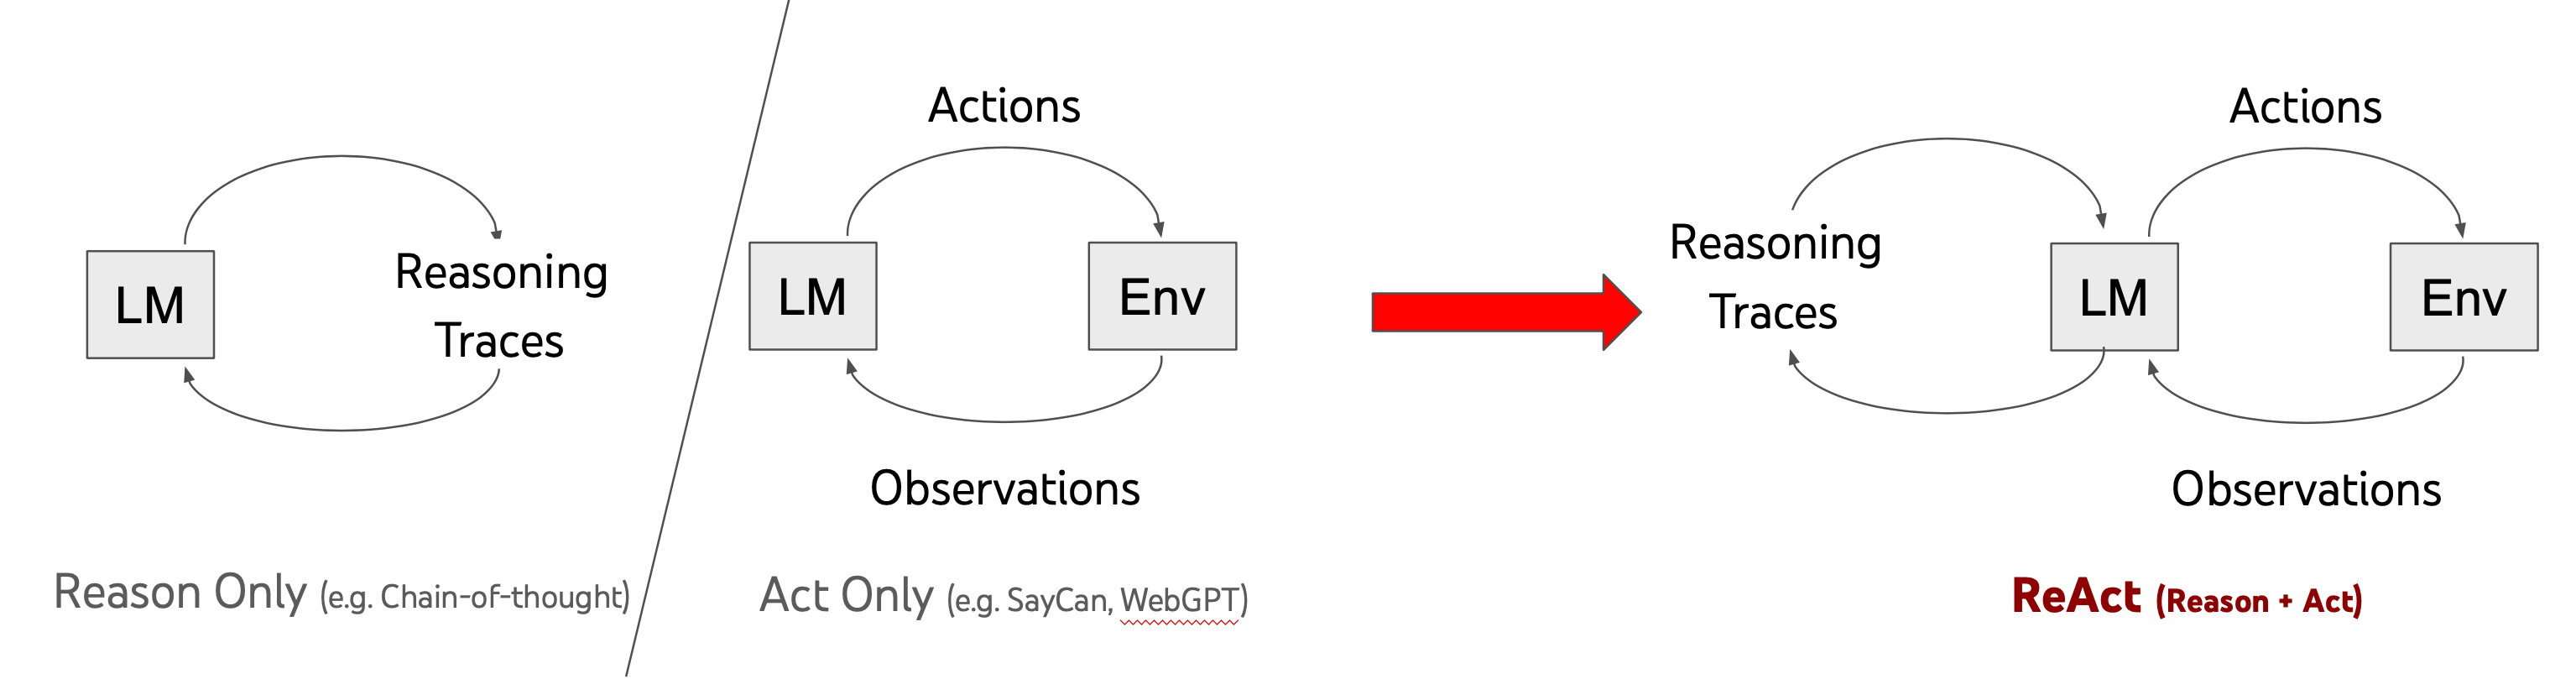

上面的示意图的来源：https://react-lm.github.io/

本章将详细介绍 ReAct 框架，ReAct 是由 Reason（推理）和 Action（行动）组成的缩写，**ReAct = Reason + Action = 推理 + 行动**。我们通过深入阐述关键原理和提供实际代码示例，旨在帮助读者全面掌握 ReAct 的关键原理和实际应用。阅读本章后，读者将能够更专业、准确地理解并应用 ReAct 框架。

## 二、ReAct 框架的核心要点
***

### 2.1 ReAct 的关键原理

你知道我们人类在做事情的时候，会先想一想（推理），然后再去做（行动），对吧？比如说，你想要搭积木，你可能会先想一想，我要搭一个什么样的积木，需要什么颜色的积木块，然后你才会去找这些积木块，开始搭建。这就是我们人类的智能，我们可以把想和做紧密地结合在一起。

现在，有一种叫做 ReAct 的方法，它就是想在计算机里模拟我们人类这种把想和做结合在一起的智能。它会让计算机先想一想（生成推理文本），然后再去做（检索信息或者调用工具）。这样，计算机就可以更好地回答问题，也可以更好地适应复杂的环境。

就像你在玩一个新的游戏，你可能会先想一想规则，然后再去玩。如果游戏中出现了一些新的情况，你也可以根据你之前的想法，来调整你的行动。这就是 ReAct 方法的核心思想，它让计算机也能像我们人类一样，先想后做，从而更好地完成任务。

### 2.2 ReAct 的提示设计

ReAct 提示设计的一个关键点是：few-shot task-solving 轨迹，**其本质在于充分利用上下文学习和提供好的演示（Demonstrations）**。这些轨迹由人工编写的文本推理和操作序列以及相应操作环境的观察结果构成。下面是一个 ReAct 提示的示例（摘自论文）：

```python
问题 科罗拉多造山带东部区域延伸到的区域的海拔范围是多少？

思考 1 我需要搜索科罗拉多造山带，找到科罗拉多造山带东段延伸的区域，然后找到该区域的海拔范围。
操作 1 搜索 [科罗拉多造山带]
观察 1 科罗拉多造山带是科罗拉多及其周边地区造山运动的一段。
思考 2 它没有提到东部地区。所以我需要查一下东部地区。
操作 2 查找 [东部地区]
观察 2 (结果 1 / 1) 东部区域延伸至高平原，称为中原造山带。
思考 3 科罗拉多造山运动的东部区域延伸到高平原。所以我需要搜索高平原，找到它的海拔范围。
操作 3 搜索 [高平原]
观察 3 高平原指的是两个截然不同的陆地区域之一。
思考 4 我需要搜索高平原（美国）
操作 4 搜索 [高平原（美国）]
观察 4 高平原是大平原的一个分区。从东到西，高平原的海拔从 1800 到 7000 英尺 (550 到 2130 米) 不等。[3]
思考 5 高平原海拔高度从 1800 到 7000 英尺，所以答案是 1800 到 7000 英尺。
操作 5 结束 [1800 到 7000 英尺]
...
```

在 LangChain 中，您可以找到封装好的 ReAct 模块的源码，其中包含更详细的 Prompt 模板和 Demonstrations：https://github.com/langchain-ai/langchain/tree/c4e9c9ca2959e2cf756fc499b7c6f35d8786e143/libs/langchain/langchain/agents/react

ReAct 的提示设计直观、灵活，并在各种任务中实现了最先进的少样本性能。研究论文表明，ReAct 的有效性在四个基准测试中进行了评估，包括问题解答和事实验证任务（如 HotpotQA 和 Fever），以及交互式决策任务（如 ALFWorld 和 WebShop）。在这些不同的领域中，ReAct 在多个方面都优于纯推理和纯行为基线方法，显示了集成推理-行动系统的潜力。

## 三、ReAct 应用示例
***

注意：我使用的测试环境是 Anaconda + Python 3.8.10。Python 的版本要求 Python 3.7+。

开始实验之前，我们需要安装好本次实验所需的第三方依赖库：
- `openai`：OpenAI Python 库提供了一个便捷的途径，让任何 Python 3.7+ 应用程序可以访问 OpenAI REST API。您可以通过运行以下命令来安装：`pip install openai==1.10.0`。

- `langchain`：LangChain 是一个基于语言模型开发应用程序的框架。您可以通过运行以下命令来安装：`pip install langchain==0.1.5`。

- `numexpr`：NumExpr 是一个高效的数值表达式计算器，用于在利用 LLM 进行数学计算时提高性能。您可以通过运行以下命令来安装：`pip install numexpr==2.8.6`。


此外，我们还需要获取一个名为 `SERPAPI_API_KEY` 的 API 密钥，并用 pip 安装 `google-search-results==2.4.2` 包。您可以在官方网站上获得密钥和更多信息：https://serpapi.com/dashboard

**SerpApi** 是一个强大且可靠的工具，用于获取搜索引擎结果。SerpApi API 可用于访问 Google 搜索结果，为开发者处理代理、解决验证码，并解析所有丰富的结构化数据。功能：快速、简单、完整的 API，可从 Google 和其他搜索引擎中获取数据；支持的搜索引擎包括 Google、Bing、Yandex 等。可以集成到主流编程语言（如 Python、Java、Go、Rust、Node.js 等）或直接在 Google Sheets 中使用。

**SerpApi 特点**：

（1）实时和真实的结果：每个 API 请求立即运行，无需等待结果。此外，每个 API 请求在完整的浏览器中运行，我们甚至会解决所有验证码，完全模仿人类的操作，确保您获得用户真正看到的内容。

（2）丰富的结构化数据：提供常规的有机搜索结果，以及地图、本地信息、故事、购物、直接答案和知识图谱。每个结果都有许多结构化数据，包括链接、地址、推文、价格、缩略图、评级、评论、丰富片段等。

导入此次实验所需的依赖库

In [1]:
import os
import warnings

from openai import OpenAI
from langchain_openai import ChatOpenAI
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent


warnings.filterwarnings("ignore")
os.environ["SERPAPI_API_KEY"] = "a08df44c......be59"

# 从环境变量中获取 OpenAI API Key 或者直接赋值
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
OPENAI_API_KEY = "sk-...你的 OpenAI API Key"

# 如果您使用的是官方 API，就直接用 https://api.openai.com/v1 就行。
BASE_URL = "https://api.openai.com/v1"
# 如果您使用的不是官方 API，而是通过代理进行请求，请设置您的代理 URL。
# BASE_URL = "https://api.xxx.../v1"

实验 1：连接搜索引擎，对比使用和不用 ReAct 的生成结果

给定任务 1："你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。"

**1. 实例化一个 LLM 对象以及设置其关键参数**
   - temperature：采样温度在 0 到 2 之间，更高的值如 0.8 会使输出更随机，而更低的值如 0.2 会使其更加集中和确定性。
   
   - model_name：使用的模型标识，此次实验演示用的是 `gpt-3.5-turbo-0125`。
   
   - max_tokens：聊天完成时可以生成的**最大 tokens 数**。注意：输入 tokens 和生成 tokens 的总长度受模型上下文长度的限制。
  
   - openai_api_key：必需的 OpenAI API Key。登录 https://platform.openai.com/ 获取。
   
   - openai_api_base：非必需，如果您使用的不是官方 API，而是通过代理进行请求，请提供您的代理 URL。
   
   - max_retries：最大重试次数。
   
   - "seed=42, presence_penalty=0, frequency_penalty=0,": 这是为了促进确定性地输出。
     这几个参数的含义具体可以参考：https://platform.openai.com/docs/api-reference/chat/create

**2. 使用 load_tools 方法加载工具 "serpapi"**

**3. 传入工具和 LLM 对象，以及实例化一个基于 ReAct 的 Agent**
   - verbose 参数为 True 则会打印全部的执行详情。

   - agent 参数设置为 AgentType.ZERO_SHOT_REACT_DESCRIPTION。


In [2]:
llm = ChatOpenAI(temperature=0.3, model_name="gpt-3.5-turbo-0125", max_tokens=1024,
                 openai_api_key=OPENAI_API_KEY,
                 openai_api_base=BASE_URL, max_retries=3,
                 seed=42, presence_penalty=0, frequency_penalty=0,
                )

tools = load_tools(["serpapi"])

agent_ReAct = initialize_agent(tools, llm, verbose=True,
                               agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
                              )

In [3]:
# 查看所用到的提示模板
print(agent_ReAct.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [4]:
# 实例化 OpenAI 对象
# 传入参数：OpenAI API Key（必需）、Base URL 和最大重试次数
client = OpenAI(api_key=OPENAI_API_KEY, base_url=BASE_URL, max_retries=3)

In [5]:
def get_completions(llm_prompt, model_endpoint):

    response = client.chat.completions.create(model=model_endpoint,
                                              messages=[
                                                        {"role": "user", "content": llm_prompt}
                                                       ],
                                              n=1, temperature=0.20, seed=42,
                                              presence_penalty=0, frequency_penalty=0,
                                              max_tokens=1024
                                             )

    return response.choices[0].message.content.strip()

没有使用 ReAct，直接 Prompting

In [6]:
prompt = "你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。"

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-中文：\n{result_no_ReAct}")


生成结果-中文：
南瓜书的核心作者是 Datawhale 团队的成员，包括但不限于以下几位：

1. 陈旸
2. 陈煜
3. 王鹏
4. 王宇
5. 杨冰楠
6. 杨冰楠
7. 张晋
8. 张晋
9. 张晋
10. 张晋

以上是南瓜书的核心作者之一。


In [7]:
prompt = "Your task is to list the names of the core authors of Datawhale's open source project Pumpkin Book."

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-英文：\n{result_no_ReAct}")


生成结果-英文：
The core authors of Datawhale's open source project Pumpkin Book are:

1. Yifan Zhang
2. Zhiwei Liu
3. Yuxuan Zhang
4. Yuxin Wu
5. Yifan Li
6. Yuxin Wu


使用 ReAct

In [8]:
# 使用 ReAct 来回答  中文
question_Chinese = "你的任务是列出 Datawhale 的开源项目南瓜书的核心作者的姓名。用中文输出结果。"
result_Chinese = agent_ReAct.run(question_Chinese)
print(f"\n生成结果-中文：\n{result_Chinese}")



> Entering new AgentExecutor chain...
我需要搜索Datawhale南瓜书的开源项目来找到核心作者的姓名。
Action: Search
Action Input: Datawhale 南瓜书 开源项目
Observation: ['南瓜书的所有内容都是以西瓜书的内容为前置知识进行表述的，所以南瓜书的最佳使用方法是以西瓜书为主线，遇到自己推导不出来或者看不懂的公式时再来查阅南瓜书； · 对于初学 ...', '言归正传，南瓜书来源于西瓜书，由开源组织Datawhale 发起，团队成员谢文睿牵头，带领6位成员，历时1个月，将西瓜书中1-7章节的公式进行了整理，对西瓜书 ...', '... Datawhale南瓜书项目，希望再也没有难推的公式，深入理解机器学习。 2020年，Datawhale开源项目“南瓜书”发布，受到全网转发。3年后，“南瓜书”完整版第 ...', '好消息是，著名的开源组织Datawhale 开源了一个GitHub 仓库：“南瓜书(PumpkinBook)”，对《机器学习》（西瓜书）里比较难理解的公式加以解析，以及对部分 ...', '一年前，Datawhale开源项目南瓜书发布，受到全网转发，一年后，南瓜书完整版正式撒花完结。从基础公式解析到难点探讨，无论你数学功底如何，都可以在南瓜 ...', '《 南瓜书Pumpkin-Book》由开源组织Datawhale发起，团队成员谢文睿、秦州牵头，针对国内机器学习经典教材--周志华老师的《机器学习》，将教材中难以理解的 ...', '一年前，Datawhale开源项目南瓜书发布，受到全网转发，一年后，南瓜书完整版正式撒花完结。从基础公式解析到难点探讨，无论你数学功底如何，都可以在 ...', '言归正传，南瓜书来源于西瓜书，由 开源组织Datawhale 发起，团队成员谢文睿牵头，带领6位成员，历时1个月，将西瓜书中1-7章节的公式进行了整理，对西瓜书 ...', '人工智能领域中文的开山之作、周志华“西瓜书”《机器学习》伴侣书，Datawhale开源协作学习笔记“南瓜书”，机器学习初学小白提升数学基础能力的练习书！ 中级github开源教程.', '西瓜书代码实战项目以西瓜书以及南瓜书为主要参考，其他资料为辅助，来进行常见机器学习代码的实战。主要特色为力求数

In [9]:
# 使用 ReAct 来回答  英文
question_English = "Your task is to list the names of the core authors of Datawhale's open source project Pumpkin Book."
result_English = agent_ReAct.run(question_English)
print(f"\n生成结果-英文：\n{result_English}")



> Entering new AgentExecutor chain...
I need to find out who the core authors of Datawhale's Pumpkin Book are.
Action: Search
Action Input: "Datawhale Pumpkin Book core authors"
Observation: ['《机器学习》（西瓜书）公式详解. Contribute to datawhalechina/pumpkin-book development by creating an account on GitHub.', '项目简介《机器学习》（西瓜书）公式详解项目负责人@Sm1les 项目地址pumpkin-book.', 'A Mini-Book for Close Reading; Math Activities (See Preview); Graphic Organizers (See Preview); Vocabulary Cards (See Preview); Pumpkin Life Cycle Flip Book ( ...', "From an acclaimed science author, here's everything about pumpkins--including how they grow! In this cheerfully-illustrated, simply-presented book, children ...", 'The Pumpkin Book by Gail Gibbons. Fountas and Pinnell: M; Lexile: 570L. Buy at Amazon.com. Book Summary: How they grow, their traditional uses and cultural ...', 'Describes how pumpkins come in different shapes and sizes, how they grow, and their traditional uses and cultural significance.', "The co-authors are f

分析实验结果：
- 传统的提示方法主要依靠 LLM 自身的参数化知识。然而，在上述实验中，无论是在中文还是英文输入提示的情况下，gpt-3.5-turbo-0125 都不能准确回答问题。事实上，Datawhale 开源项目《南瓜书》的核心作者是 "谢文睿"，尽管 LLM 输出了内容，但存在幻觉问题。

- 相比之下，ReAct 强调了 LLM 与外部工具之间的协作（例如上述实验中使用了搜索），从而实现更精确、具有情境化的响应。当输入中文提示时，gpt-3.5-turbo-0125 给出了准确的答案："谢文睿"；然而当输入英文提示时，生成结果是："The core authors of Datawhale's open source project Pumpkin Book are Michael and Lennon."，产生了幻觉。这可能是由于中文/英文关键词检索结果质量问题导致的，在中文场景下，《南瓜书》的信息更为丰富。

实验 2：连接搜索引擎和数学计算工具，对比使用和不用 ReAct 的生成结果。

给定任务 2："强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。"

In [10]:
# 使用 load_tools 方法加载工具 "serpapi" 和 "llm-math"
tools = load_tools(["serpapi", "llm-math"], llm=llm)

agent_ReAct = initialize_agent(tools, llm, verbose=True,
                               agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
                              )

In [11]:
# 查看所用到的提示模板
print(agent_ReAct.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

Search: A search engine. Useful for when you need to answer questions about current events. Input should be a search query.
Calculator: Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Search, Calculator]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


没有使用 ReAct，直接 Prompting

In [12]:
prompt = "强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。"

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-中文：\n{result_no_ReAct}")


生成结果-中文：
强化学习教程（蘑菇书）现在的价格是 100 元。如果你在此基础上降价 15%，应该定价为 85 元。


In [13]:
prompt = "What is the current price of the Reinforcement Learning Tutorial (The Mushroom Book)? How should I price it if I sell it with a 15% price reduction on top of that?"

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-英文：\n{result_no_ReAct}")


生成结果-英文：
The current price of the Reinforcement Learning Tutorial (The Mushroom Book) is $50. 

If you sell it with a 15% price reduction on top of that, the new price would be calculated as follows:

Price reduction = 15% of $50 = 0.15 x 50 = $7.50

New price = $50 - $7.50 = $42.50

Therefore, if you sell the book with a 15% price reduction, the new price would be $42.50.


使用 ReAct

In [17]:
# 使用 ReAct 的生成结果  中文
question_Chinese = "强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？用中文输出结果。"
result_Chinese = agent_ReAct.run(question_Chinese)

print(f"\n生成结果-中文：\n{result_Chinese}")



> Entering new AgentExecutor chain...
我需要使用搜索引擎来查找“强化学习教程（蘑菇书）价格”。
Action: Search
Action Input: "强化学习教程（蘑菇书）价格"
Observation: ['蘑菇书正版Easy RL 强化学习教程蘑菇书深度学习机器. ¥66.90. 约SGD $12.66. 价格可能因优惠活动发生变化. 优惠. 该商品提供多种优惠. 淘宝网现提供跨境集运、跨境直送 ...', 'Easy RL 强化学习教程蘑菇书深度强化学习落地指南机器学习人工智能导论神经网络与深度学习编程入门电脑书籍人民邮电出版社. ¥46.17. 约SGD $8.74. 价格可能因优惠活动 ...', '京东是国内专业的强化学习网上购物商城，本频道提供强化学习价格表，强化学习报价行情、强化学习多少钱等信息，为您选购强化学习提供全方位的价格参考，提供愉悦的网上 ...', '京东是国内专业的强化学习网上购物商城，本频道提供强化学习价格表，强化学习报价行情、强化学习多少钱等信息，为您选购强化学习提供全方位的价格参考，提供愉悦的网上 ...', '此外，为了教程的完整性，我们整理了周博磊老师的《强化学习纲要》、李科浇老师的《世界冠军带你从零实践强化学习》以及多个强化学习的经典资料作为补充。对于想入门强化 ...', 'Easy RL 强化学习教程蘑菇书深度学习机器学习书籍神经网络机器学习实战西瓜书南瓜书李宏毅周博磊李科浇开源教程书籍 ; 20.80. 成交2408笔 ; 13.93. 成交127笔 ; 7.59. 成交2笔.', '优惠时效有限，需要的朋友抓紧购买吧！ 《Easy RL 强化学习教程(easyrl蘑菇书)(异步图书 ... 价格砍掉近一半，从500 万压到300 万！我把小梁叫来，当着他的 ...', '本书结合了李宏毅老师的“深度强化学习”、周博磊老师的“强化学习纲要”、李科浇老师的“世界冠军带你从零实践强化学习”公开课的精华内容，在理论严谨的基础上深入浅出地介绍 ...', '蘑菇书《Easy RL》介绍了强化学习的基础知识和Markov决策过程，以及Q网络的一些特性和优化方法。文章还讨论了延迟的策略更新和目标策略平滑等内容。']
Thought:我需要计算降价15%后的价格。
Action: Ca

In [19]:
# 使用 ReAct 的生成结果  英文
question_English = "What is the current price of the Reinforcement Learning Tutorial (The Mushroom Book, By DataWhale)? How should I price it if I sell it with a 15% price reduction on top of that?"
result_English = agent_ReAct.run(question_English)

print(f"\n生成结果-英文：\n{result_English}")



> Entering new AgentExecutor chain...
I need to search for the current price of the Reinforcement Learning Tutorial and then calculate the price with a 15% reduction.
Action: Search
Action Input: "Reinforcement Learning Tutorial The Mushroom Book price DataWhale"
Observation: ['MushroomRL is a Reinforcement Learning (RL) library that aims to be a simple, yet powerful way to make RL and deep RL experiments.', 'It allows to perform RL experiments in a simple way providing classical RL algorithms (e.g. Q-Learning, SARSA, FQI), and deep RL algorithms (e.g. DQN, DDPG, SAC ...', 'Natural language is an intuitive and expressive way to communicate reward information to au- tonomous agents. It encompasses everything.', 'MushroomRL is a Reinforcement Learning (RL) library developed to be a simple, yet powerful way to make RL and deep RL experiments. The idea behind ...', 'MushroomRL is an open-source Python library developed to simplify the process of implementing and running Reinforcement Lea

需要指出的是，ReAct 并不是完美的，有时多次检索和计算可能会导致报错。在我进行调试的过程中，就遇到了以下的报错：

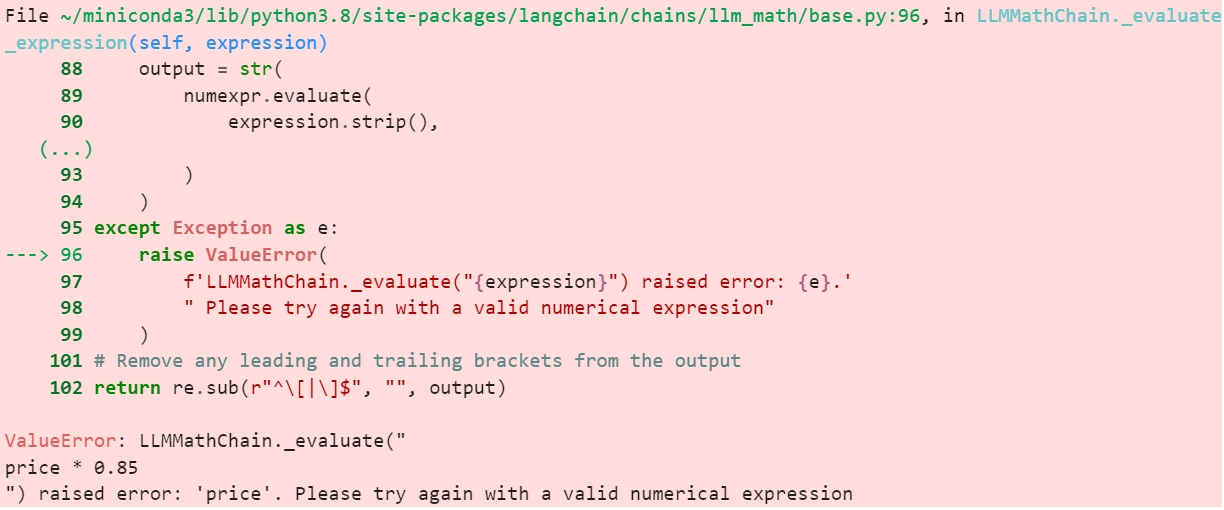

分析实验结果：
- 针对给定的问题："强化学习教程（蘑菇书）现在的价格是多少？如果我在此基础上降价 15% 卖出，应该如何定价？"。推理思路应为：首先需要确定这本书的具体价格，然后才能准确地计算出基于此降价 15% 的价格。

- 在没有使用 ReAct，直接 Prompting 的情况下，无论输入提示是中文还是英文，gpt-3.5-turbo-0125 都无法准确回答问题。

- 当使用 ReAct 并输入中文提示时，gpt-3.5-turbo-0125 能够给出准确的答案：“我现在知道了强化学习教程（蘑菇书）的价格是 66.90 元，降价 15% 后的定价应为 56.865 元。”

- 当使用 ReAct 并输入英文提示时，gpt-3.5-turbo-0125 无法给出准确的答案，其生成的结果为：“The current price of the Reinforcement Learning Tutorial (The Mushroom Book, By DataWhale) is 45.99 dollar, and it should be priced at 6.90 dollar if sold with a 15% reduction.” （备注："$" 符号在 MarkDown 中渲染存在冲突，所以使用 dollar 替代）

- 在输入中文提示时，给出的答案都是准确的。分析表明，在实际应用中，如果是中文环境，参考 ReAct 的源代码并根据特定需求定制中文的 Prompt 模板和演示是有价值的。

- 通过观察 ReAct 的执行过程，我们发现它以交错的方式生成推理轨迹和任务特定操作，这增强了 LLM 的可解释性。

前面的实验结果表明，在某些情况下，使用英文 Prompt 的效果并不理想。因此，我们再补充一个示例，让 LLM 回答：今天的日期是什么？列出历史上在这一天发生的重大事件。（请注意：我进行测试的日期是北京时间 **2024 年 3 月 1 日**）

In [34]:
prompt = "今天的日期是什么？列出历史上在这一天发生的重大事件。请用中文回答。"

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-中文：\n{result_no_ReAct}")


生成结果-中文：
今天的日期是2021年11月29日。

历史上在11月29日发生的重大事件有：
1. 1890年11月29日，美国印第安人领袖坐骑牛被美军杀害。
2. 1947年11月29日，联合国大会通过了一项决议，将巴勒斯坦划分为犹太人国家和阿拉伯国家。
3. 1963年11月29日，美国总统肯尼迪遇刺身亡。
4. 2009年11月29日，泰国发生了严重的抗议活动，导致多人死亡和受伤。


In [35]:
prompt = "What's the date today? List the great events that have occurred on this day in history."

result_no_ReAct = get_completions(prompt, "gpt-3.5-turbo-0125")
print(f"\n生成结果-英文：\n{result_no_ReAct}")


生成结果-英文：
Today is October 26th.

Some great events that have occurred on this day in history include:

1. 1881 - The Gunfight at the O.K. Corral takes place in Tombstone, Arizona.
2. 1905 - Sweden agrees to the independence of Norway.
3. 1947 - The Maharaja of Kashmir agrees to join India.
4. 1977 - The last natural case of smallpox is reported in Somalia.
5. 2001 - The United States passes the USA PATRIOT Act in response to the September 11th terrorist attacks.


In [36]:
# 使用 ReAct 的生成结果  中文
question_Chinese = "今天的日期是什么？列出历史上在这一天发生的重大事件。请用中文回答。"
result_Chinese = agent_ReAct.run(question_Chinese)

print(f"\n生成结果-中文：\n{result_Chinese}")



> Entering new AgentExecutor chain...
我需要查一下今天的日期，然后搜索历史上的重大事件。
Action: Search
Action Input: 今天日期
Observation: Friday, March 1, 2024
Thought:现在我需要搜索一下历史上在3月1日发生的重大事件。
Action: Search
Action Input: March 1 historical events
Observation: Articles of Confederation
Thought:现在我知道了今天的日期和历史上在3月1日发生的重大事件。
Final Answer: 今天是2024年3月1日，历史上在这一天发生了美国《联邦条例》的签署。

> Finished chain.

生成结果-中文：
今天是2024年3月1日，历史上在这一天发生了美国《联邦条例》的签署。


《邦联条款与永久联盟》是美国 13 个州之间的协议，这些州曾经是美国的十三个殖民地，它们被视为国家的第一个政府框架。它在 1776 年 7 月至 1777 年 11 月间在费城的独立厅由第二次大陆会议进行了讨论，最终由大陆会议于 1777 年 11 月 15 日拟定。在经过所有 13 个殖民地州的批准后，于 1781 年 3 月 1 日生效。

维基百科 Articles of Confederation：https://en.wikipedia.org/wiki/Articles_of_Confederation

In [40]:
# 使用 ReAct 的生成结果  英文
question_English = "What's the date today? List the great events that have occurred on this day in history."
result_English = agent_ReAct.run(question_English)

print(f"\n生成结果-英文：\n{result_English}")



> Entering new AgentExecutor chain...
I need to find out today's date and historical events that happened on this day.
Action: Search
Action Input: "current date"
Observation: Friday, March 1, 2024
Thought:Now I need to search for historical events that happened on March 1st.
Action: Search
Action Input: "historical events on March 1"
Observation: ["Historical Events on March 1 · Sons of Emperors Made Caesar · 1st New Testament in Greek Published · Drake's Richest Plunder · Henry IV Excommunication Threat.", '1968. Daniel Craig. English actor ; 1942. Lou Reed. American musician ; 1931. Mikhail Gorbachev. president of Soviet Union ; 1930. Tom Wolfe. American author ; 1904.', 'On this day - March 1 ; 1998 Titanic becomes the first film to gross $1 billion ; 1995 Internet giant Yahoo! is incorporated ; 1947 The International Monetary Fund ...', "Discover what happened on March 1 with HISTORY's summaries of major events, anniversaries, famous births and notable deaths.", '509 BC – Publiu

在这个示例中，直接提示 GPT-3.5 Turbo 问答：今天的日期是什么？列出历史上在这一天发生的重大事件。结果是：模型一本正经地胡说八道。

GPT-3.5 Turbo 可以通过 ReAct 准确地回答这个问题。我们通过访问这个网站 https://www.onthisday.com/events/march/1 和使用搜索引擎进行事实检查。结果显示，使用英文 Prompt 的效果比使用中文 Prompt 更好。

## 四、总结与讨论
***

你知道我们玩乐高积木时，我们会想一想，然后拿一个积木，再想一想，再拿一个积木，直到我们建造出我们想要的东西，对吧？这就是我们思考和行动交替进行的过程。ReAct 就像一个聪明的机器人，它也会这样做。它会想一想，然后做一些事情，再想一想，再做一些事情，直到它完成了它的任务。这就是为什么我们说 ReAct 通过交替使用语言推理和可执行计划，模仿了人类解决问题的思维方式。

在这个过程中，大语言模型（LLM）就像机器人的大脑，它可以控制机器人的 “手” 和 “脚”，让机器人知道下一步应该做什么。ReAct 的优点是它很灵活，就像我们可以用乐高积木建造各种各样的东西一样。它也很容易使用，就像我们很容易地拿起和放下乐高积木一样。而且，它可以从很少的例子中学习，就像我们可以从几个乐高积木中学习如何建造一个房子一样。最后，它的行为是可以解释的，就像我们可以解释我们是如何用乐高积木建造房子的一样。

此外，**ReAct 也是一种优秀的微调格式**。我们可以利用推理轨迹和正确的结果数据来构建中间过程的数据集，这是一种有效的降低标注成本的方法，可以通过这种方法以较低的成本构建高质量的 Fine-tuning 数据集。研究者已经观察到，当模型大小约为 60B 时，Fine-tuning 带来的性能提升远超过 Prompt 方法，这表明 ReAct 结合 Fine-tuning 可能是提高 LLM 性能的有效方式。

最后，值得一提的是，**ReAct 可以被视为当前人工智能领域中热门的 Agent 研究的开创性工作**。ReAct 提出了一种基于 LLM 的 Agent 范式，并在问答和决策任务上取得了良好的结果，但其性能受到 LLM 能力的限制。对于具有大动作空间的复杂任务，需要更多的演示才能进行有效的学习。然而，这很容易超出 LLM 的上下文学习的输入长度限制。

参考资料：
- ICLR 2023 - ReAct: Synergizing Reasoning and Acting in Language Models，https://openreview.net/forum?id=WE_vluYUL-X

- Lilian Weng - LLM Powered Autonomous Agents，https://lilianweng.github.io/posts/2023-06-23-agent/
